#### **Importing modules**

In [ ]:
import tensorflow
from tensorflow import keras
from keras.layers import Dense,Flatten
from keras import Sequential

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

#### **Load Data**

In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
len(X_train)

60000

In [ ]:
len(X_train[0])

28

 class_labels:
 
0 => T-shirt/top 

1 => Trouser 

2 => Pullover 

3 => Dress 

4 => Coat 

5 => Sandal 

6 => Shirt 

7 => Sneaker 

8 => Bag 

9 => Ankle boot 

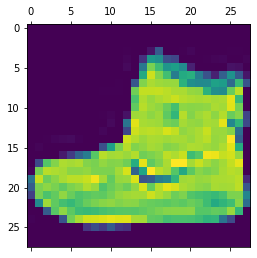

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

9

#### **Feature Scaling**

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#### **Build Neural Network**

In [ ]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(32,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history = model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5523 - accuracy: 0.8093 - val_loss: 0.4787 - val_accuracy: 0.8304
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4243 - accuracy: 0.8515 - val_loss: 0.4291 - val_accuracy: 0.8486
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3869 - accuracy: 0.8623 - val_loss: 0.4195 - val_accuracy: 0.8536
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3628 - accuracy: 0.8700 - val_loss: 0.3987 - val_accuracy: 0.8585
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3451 - accuracy: 0.8753 - val_loss: 0.3827 - val_accuracy: 0.8634
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3330 - accuracy: 0.8794 - val_loss: 0.3742 - val_accuracy: 0.8687
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3210 - accuracy: 0.8837 - val_loss: 0.3760 - val_accuracy

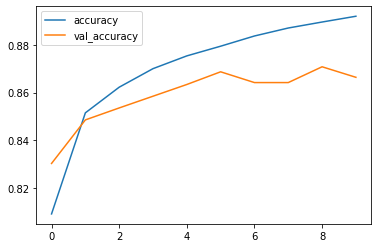

In [ ]:
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.legend()

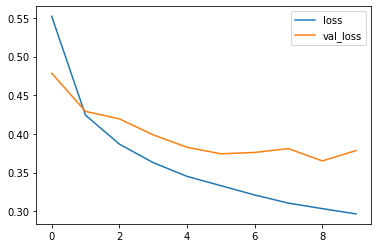

In [ ]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend()

#### **Evaluating on Test Data**

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3784 - accuracy: 0.8664


[0.37840160727500916, 0.8664000034332275]

#### **Confusion matrix**

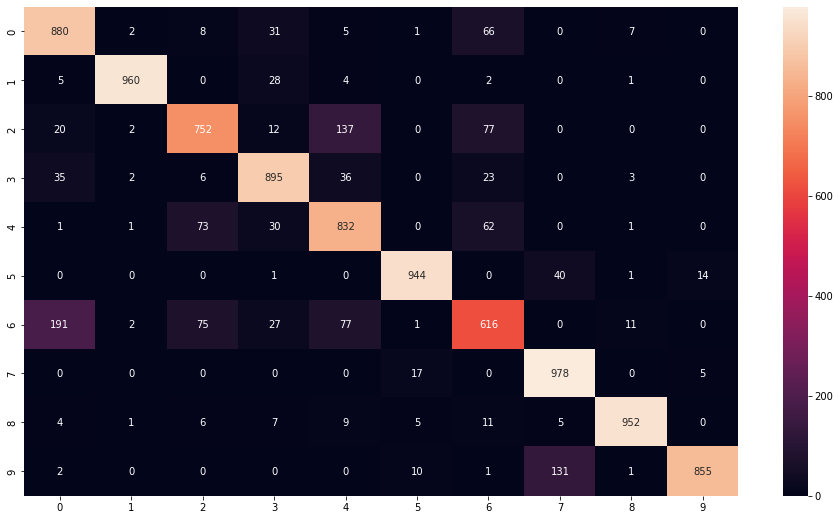

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(confusion_matrix(y_test,class_label),annot=True,fmt="d")

In [ ]:
print(classification_report(y_test,class_label))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.82      0.75      0.78      1000
           3       0.87      0.90      0.88      1000
           4       0.76      0.83      0.79      1000
           5       0.97      0.94      0.95      1000
           6       0.72      0.62      0.66      1000
           7       0.85      0.98      0.91      1000
           8       0.97      0.95      0.96      1000
           9       0.98      0.85      0.91      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



#### **Prediction**

In [ ]:
class_label = model.predict(X_test).argmax(axis=1)
class_label

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

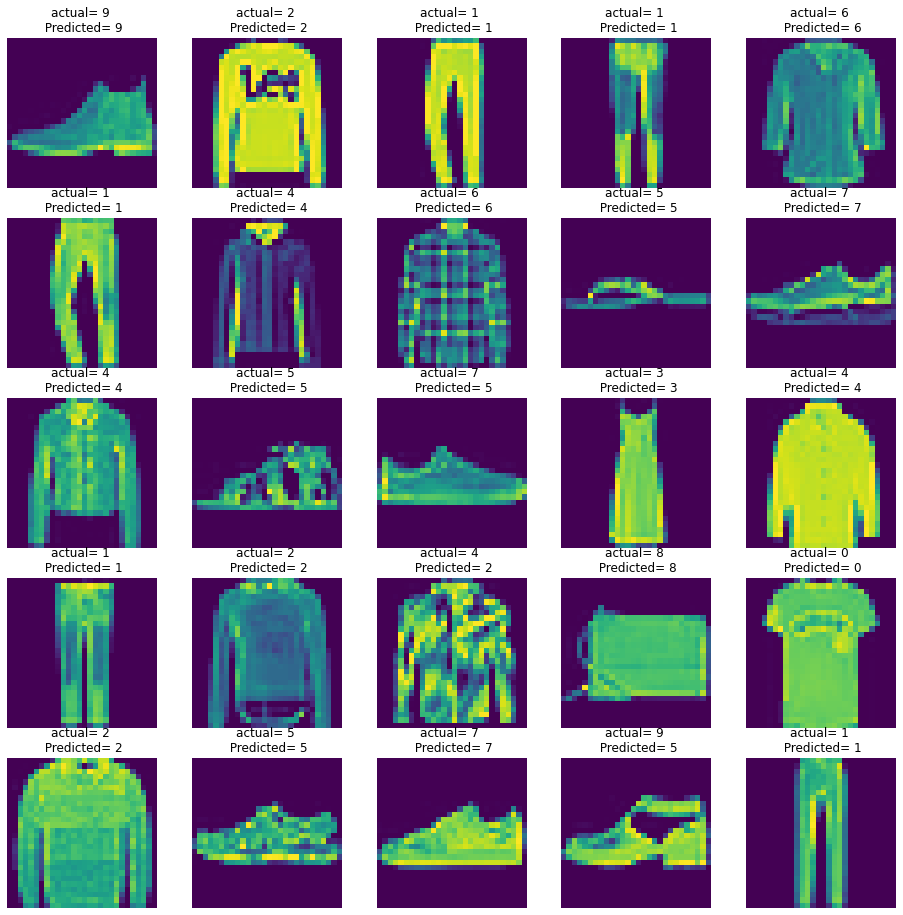

In [ ]:
plt.figure(figsize=(16,16))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(X_test[i])
  plt.axis("off")
  plt.title(f"actual= {y_test[i]} \n Predicted= {class_label[i]}")

#### **Save Model**

In [ ]:
model.save("fashion_mnist_classifier.h5")